In [1]:
%display latex
from ulbc import *
from flowstar import *
from ulbc.bondcalculus import *

In [2]:
R.<x1,x2,x3,x4,x5,x6,x7,x8,x9> = RIF[]

In [3]:
y = vector([
    10*x3 - RIF('0.1')*x1*x6,
    100*x4 - x1*x2,
    RIF('0.1')*x1*x6 - 50*x3,
    x2*x6 - 100*x4,
    5*x3 + RIF('0.5')*x1 - 10*x5,
    50*x5 + 50*x3 + 100*x4 - x6*(RIF('0.1')*x1 + x2 + 2*x8 + 1),
    50*x4 + RIF('0.01')*x2 - RIF('0.5')*x7,
    RIF('0.5')*x7 - 2*x6*x8 + x9 - RIF('0.2')*x8,
    2*x6*x8 - x9,
])

In [4]:
y

(-0.10000000000000000?*x1*x6 + 10*x3, -x1*x2 + 100*x4, 0.10000000000000000?*x1*x6 - 50*x3, x2*x6 - 100*x4, 0.50000000000000000?*x1 + 5*x3 - 10*x5, -0.10000000000000000?*x1*x6 - x2*x6 - 2*x6*x8 + 50*x3 + 100*x4 + 50*x5 - x6, 0.01000000000000000?*x2 + 50*x4 - 0.50000000000000000?*x7, -2*x6*x8 + 0.50000000000000000?*x7 - 0.2000000000000000?*x8 + x9, 2*x6*x8 - x9)

In [5]:
table([[yi] for yi in y])

""
""
""
""
""
""
""
""
""


In [6]:
y0 = [
    RIF('[0.98, 1.02]'),
    RIF('[1.28, 1.32]'),
    RIF('[0.08, 0.12]'),
    RIF('[0.08, 0.12]'), # x4
    RIF('[0.08, 0.12]'),
    RIF('[1.28, 1.32]'), # x6
    RIF('[2.48, 2.52]'),
    RIF('[0.58, 0.62]'),
    RIF('[1.28, 1.32]'),
]

In [7]:
table([y0i.endpoints() for y0i in y0])

,
,
,
,
,
,
,
,
,


In [8]:
R

Multivariate Polynomial Ring in x1, x2, x3, x4, x5, x6, x7, x8, x9 over Real Interval Field with 53 bits of precision

In [9]:
sys = System(R, R.gens(), y0, y); sys

System(R, (x1, x2, x3, x4, x5, x6, x7, x8, x9), [[0.97999999999999998 .. 1.0200000000000001], [1.2799999999999998 .. 1.3200000000000001], [0.079999999999999987 .. 0.12000000000000001], [0.079999999999999987 .. 0.12000000000000001], [0.079999999999999987 .. 0.12000000000000001], [1.2799999999999998 .. 1.3200000000000001], [2.4799999999999999 .. 2.5200000000000001], [0.57999999999999996 .. 0.62000000000000011], [1.2799999999999998 .. 1.3200000000000001]], (-0.10000000000000000?*x1*x6 + 10*x3, -x1*x2 + 100*x4, 0.10000000000000000?*x1*x6 - 50*x3, x2*x6 - 100*x4, 0.50000000000000000?*x1 + 5*x3 - 10*x5, -0.10000000000000000?*x1*x6 - x2*x6 - 2*x6*x8 + 50*x3 + 100*x4 + 50*x5 - x6, 0.01000000000000000?*x2 + 50*x4 - 0.50000000000000000?*x7, -2*x6*x8 + 0.50000000000000000?*x7 - 0.2000000000000000?*x8 + x9, 2*x6*x8 - x9), varmap=bidict({'x1': x1, 'x2': x2, 'x3': x3, 'x4': x4, 'x5': x5, 'x6': x6, 'x7': x7, 'x8': x8, 'x9': x9}))

In [10]:
RReal = RR['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9']

In [11]:
RReal(sys.y[2])

0.100000000000000*x1*x6 - 50.0000000000000*x3

In [12]:
sys_real = System(
    RReal,
    RReal.gens(),
    [y0i.center() for y0i in sys.y0],
    [RReal(yi) for yi in sys.y],
)
sys_real

System(R, (x1, x2, x3, x4, x5, x6, x7, x8, x9), [1, [1.2999999999999998 .. 1.2999999999999999], [0.10000000000000000 .. 0.10000000000000001], [0.10000000000000000 .. 0.10000000000000001], [0.10000000000000000 .. 0.10000000000000001], [1.2999999999999998 .. 1.2999999999999999], [2.5000000000000000 .. 2.5000000000000000], [0.60000000000000008 .. 0.60000000000000009], [1.2999999999999998 .. 1.2999999999999999]], (-0.100000000000000*x1*x6 + 10.0000000000000*x3, -x1*x2 + 100.000000000000*x4, 0.100000000000000*x1*x6 - 50.0000000000000*x3, x2*x6 - 100.000000000000*x4, 0.500000000000000*x1 + 5.00000000000000*x3 - 10.0000000000000*x5, -0.100000000000000*x1*x6 - x2*x6 - 2.00000000000000*x6*x8 + 50.0000000000000*x3 + 100.000000000000*x4 + 50.0000000000000*x5 - x6, 0.0100000000000000*x2 + 50.0000000000000*x4 - 0.500000000000000*x7, -2.00000000000000*x6*x8 + 0.500000000000000*x7 - 0.200000000000000*x8 + x9, 2.00000000000000*x6*x8 - x9), varmap=bidict({'x1': x1, 'x2': x2, 'x3': x3, 'x4': x4, 'x5': x5, 'x6': x6, 'x7': x7, 'x8': x8, 'x9': x9}))

In [13]:
y0_real = [y0i.center() for y0i in sys.y0]
table([[y0i] for y0i in y0_real])

""
""
""
""
""
""
""
""
""


In [14]:
timepoints = srange(0,10,0.1)

In [15]:
sln = desolve_odeint(sys_real.y, y0_real, timepoints, list(sys_real.x))

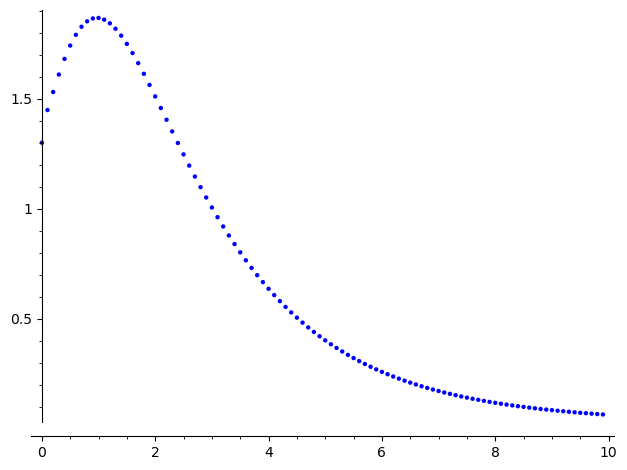

In [16]:
points(zip(timepoints, [yi[1] for yi in sln]))

In [17]:
from scipy.integrate import solve_ivp
from ulbc.matricies import vec_to_numpy, mat_to_numpy, convert_vec, sympy_gens

In [18]:
f = vec_to_numpy(RReal, sys_real.y)
jac = mat_to_numpy(RReal, sage.jacobian(sys_real.y, sys_real.x))

In [19]:
sln = solve_ivp(f,
                (0, 10),
                y0_real,
                method='LSODA',
                jac=jac,
                vectorized=True,
                dense_output=True)

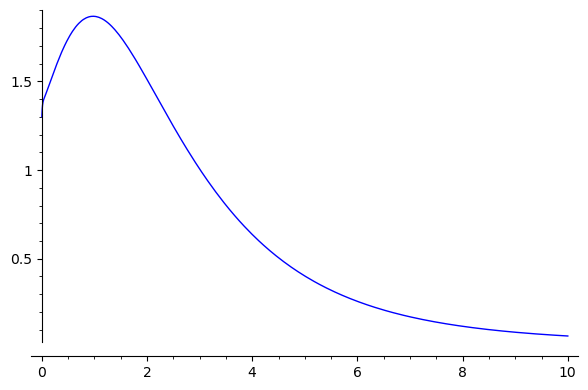

In [20]:
plot(lambda t: sln.sol(t)[1], (0, 10))

In [21]:
import time
t0 = time.time()
r = sys.reach(
    3, order=4, step=0.003,
    precondition=1,
    estimation=1e-1,
    max_remainder_queue=200,
    integration_method=IntegrationMethod.ONLY_PICARD_SYMB,
    cutoff_threshold=1e-6)
t1 = time.time()
print(f"Reachability done in {t1 - t0}")

calling reach with y0 = ['[0.97999999999999998 .. 1.0200000000000001]', '[1.2799999999999998 .. 1.3200000000000001]', '[0.079999999999999987 .. 0.12000000000000001]', '[0.079999999999999987 .. 0.12000000000000001]', '[0.079999999999999987 .. 0.12000000000000001]', '[1.2799999999999998 .. 1.3200000000000001]', '[2.4799999999999999 .. 2.5200000000000001]', '[0.57999999999999996 .. 0.62000000000000011]', '[1.2799999999999998 .. 1.3200000000000001]']
ode in polynomial ring
entering managed function _init_args
entering global manager
num_flowpipes: 0
swapping variables
=== before ===
global: 0 dim
local: 0 dim
global: 0 flowpipes
stored: 0 flowpipes
=== after ===
global: 0 dim
local: 0 dim
global: 0 flowpipes
stored: 0 flowpipes
stack: [<flowstar.global_manager.FlowstarGlobalManager object at 0x7f2e9886bd60>]
num_flowpipes: 0
crude_roots = False
_handle_initials called!
vars = [x1, x2, x3, x4, x5, x6, x7, x8, x9]
C = [0.98..1.02]
C = [1.2799999999999998..1.32]
C = [0.07999999999999999..0.12

In [22]:
r.num_flowpipes

entering global manager
num_flowpipes: 0
swapping variables
=== before ===
global: 0 dim
local: 0 dim
global: 0 flowpipes
stored: 0 flowpipes
=== after ===
global: 0 dim
local: 0 dim
global: 0 flowpipes
stored: 0 flowpipes
stack: [<flowstar.global_manager.FlowstarGlobalManager object at 0x7f2e9886bd60>]
num_flowpipes: 0
exiting global manager
num_flowpipes: 0
swapping variables
=== before ===
global: 0 dim
local: 0 dim
global: 0 flowpipes
stored: 0 flowpipes
=== after ===
global: 0 dim
local: 0 dim
global: 0 flowpipes
stored: 0 flowpipes
stack: []


1000

entering managed function sage_interval_plot
entering global manager
num_flowpipes: 0
swapping variables
=== before ===
global: 0 dim
local: 0 dim
global: 0 flowpipes
stored: 0 flowpipes
=== after ===
global: 0 dim
local: 0 dim
global: 0 flowpipes
stored: 0 flowpipes
stack: [<flowstar.global_manager.FlowstarGlobalManager object at 0x7f2e9886bd60>]
num_flowpipes: 0
var_id_x = -1
var_id_y = -1
entering global manager
num_flowpipes: 0
stack: [<flowstar.global_manager.FlowstarGlobalManager object at 0x7f2e9886bd60>, <flowstar.global_manager.FlowstarGlobalManager object at 0x7f2e9886bd60>]
num_flowpipes: 0
exiting global manager
num_flowpipes: 0
stack: [<flowstar.global_manager.FlowstarGlobalManager object at 0x7f2e9886bd60>]
entering managed function __call__
entering global manager
num_flowpipes: 0
stack: [<flowstar.global_manager.FlowstarGlobalManager object at 0x7f2e9886bd60>, <flowstar.global_manager.FlowstarGlobalManager object at 0x7f2e9886bd60>]
num_flowpipes: 0
entering managed fun

exiting global manager
num_flowpipes: 0
stack: [<flowstar.global_manager.FlowstarGlobalManager object at 0x7f2e9886bd60>]
entering managed function __call__
entering global manager
num_flowpipes: 0
stack: [<flowstar.global_manager.FlowstarGlobalManager object at 0x7f2e9886bd60>, <flowstar.global_manager.FlowstarGlobalManager object at 0x7f2e9886bd60>]
num_flowpipes: 0
entering managed function prepare
entering global manager
num_flowpipes: 0
stack: [<flowstar.global_manager.FlowstarGlobalManager object at 0x7f2e9886bd60>, <flowstar.global_manager.FlowstarGlobalManager object at 0x7f2e9886bd60>, <flowstar.global_manager.FlowstarGlobalManager object at 0x7f2e9886bd60>]
num_flowpipes: 0
exiting global manager
num_flowpipes: 0
stack: [<flowstar.global_manager.FlowstarGlobalManager object at 0x7f2e9886bd60>, <flowstar.global_manager.FlowstarGlobalManager object at 0x7f2e9886bd60>]
exiting global manager
num_flowpipes: 0
stack: [<flowstar.global_manager.FlowstarGlobalManager object at 0x7f2e

exiting global manager
num_flowpipes: 0
stack: [<flowstar.global_manager.FlowstarGlobalManager object at 0x7f2e9886bd60>]
entering managed function __call__
entering global manager
num_flowpipes: 0
stack: [<flowstar.global_manager.FlowstarGlobalManager object at 0x7f2e9886bd60>, <flowstar.global_manager.FlowstarGlobalManager object at 0x7f2e9886bd60>]
num_flowpipes: 0
entering managed function prepare
entering global manager
num_flowpipes: 0
stack: [<flowstar.global_manager.FlowstarGlobalManager object at 0x7f2e9886bd60>, <flowstar.global_manager.FlowstarGlobalManager object at 0x7f2e9886bd60>, <flowstar.global_manager.FlowstarGlobalManager object at 0x7f2e9886bd60>]
num_flowpipes: 0
exiting global manager
num_flowpipes: 0
stack: [<flowstar.global_manager.FlowstarGlobalManager object at 0x7f2e9886bd60>, <flowstar.global_manager.FlowstarGlobalManager object at 0x7f2e9886bd60>]
exiting global manager
num_flowpipes: 0
stack: [<flowstar.global_manager.FlowstarGlobalManager object at 0x7f2e

exiting global manager
num_flowpipes: 0
stack: [<flowstar.global_manager.FlowstarGlobalManager object at 0x7f2e9886bd60>]
entering managed function __call__
entering global manager
num_flowpipes: 0
stack: [<flowstar.global_manager.FlowstarGlobalManager object at 0x7f2e9886bd60>, <flowstar.global_manager.FlowstarGlobalManager object at 0x7f2e9886bd60>]
num_flowpipes: 0
entering managed function prepare
entering global manager
num_flowpipes: 0
stack: [<flowstar.global_manager.FlowstarGlobalManager object at 0x7f2e9886bd60>, <flowstar.global_manager.FlowstarGlobalManager object at 0x7f2e9886bd60>, <flowstar.global_manager.FlowstarGlobalManager object at 0x7f2e9886bd60>]
num_flowpipes: 0
exiting global manager
num_flowpipes: 0
stack: [<flowstar.global_manager.FlowstarGlobalManager object at 0x7f2e9886bd60>, <flowstar.global_manager.FlowstarGlobalManager object at 0x7f2e9886bd60>]
exiting global manager
num_flowpipes: 0
stack: [<flowstar.global_manager.FlowstarGlobalManager object at 0x7f2e

exiting global manager
num_flowpipes: 0
stack: [<flowstar.global_manager.FlowstarGlobalManager object at 0x7f2e9886bd60>]
entering managed function __call__
entering global manager
num_flowpipes: 0
stack: [<flowstar.global_manager.FlowstarGlobalManager object at 0x7f2e9886bd60>, <flowstar.global_manager.FlowstarGlobalManager object at 0x7f2e9886bd60>]
num_flowpipes: 0
entering managed function prepare
entering global manager
num_flowpipes: 0
stack: [<flowstar.global_manager.FlowstarGlobalManager object at 0x7f2e9886bd60>, <flowstar.global_manager.FlowstarGlobalManager object at 0x7f2e9886bd60>, <flowstar.global_manager.FlowstarGlobalManager object at 0x7f2e9886bd60>]
num_flowpipes: 0
exiting global manager
num_flowpipes: 0
stack: [<flowstar.global_manager.FlowstarGlobalManager object at 0x7f2e9886bd60>, <flowstar.global_manager.FlowstarGlobalManager object at 0x7f2e9886bd60>]
exiting global manager
num_flowpipes: 0
stack: [<flowstar.global_manager.FlowstarGlobalManager object at 0x7f2e

exiting global manager
num_flowpipes: 0
stack: [<flowstar.global_manager.FlowstarGlobalManager object at 0x7f2e9886bd60>]
entering managed function __call__
entering global manager
num_flowpipes: 0
stack: [<flowstar.global_manager.FlowstarGlobalManager object at 0x7f2e9886bd60>, <flowstar.global_manager.FlowstarGlobalManager object at 0x7f2e9886bd60>]
num_flowpipes: 0
entering managed function prepare
entering global manager
num_flowpipes: 0
stack: [<flowstar.global_manager.FlowstarGlobalManager object at 0x7f2e9886bd60>, <flowstar.global_manager.FlowstarGlobalManager object at 0x7f2e9886bd60>, <flowstar.global_manager.FlowstarGlobalManager object at 0x7f2e9886bd60>]
num_flowpipes: 0
exiting global manager
num_flowpipes: 0
stack: [<flowstar.global_manager.FlowstarGlobalManager object at 0x7f2e9886bd60>, <flowstar.global_manager.FlowstarGlobalManager object at 0x7f2e9886bd60>]
exiting global manager
num_flowpipes: 0
stack: [<flowstar.global_manager.FlowstarGlobalManager object at 0x7f2e

exiting global manager
num_flowpipes: 0
stack: [<flowstar.global_manager.FlowstarGlobalManager object at 0x7f2e9886bd60>]
entering managed function __call__
entering global manager
num_flowpipes: 0
stack: [<flowstar.global_manager.FlowstarGlobalManager object at 0x7f2e9886bd60>, <flowstar.global_manager.FlowstarGlobalManager object at 0x7f2e9886bd60>]
num_flowpipes: 0
entering managed function prepare
entering global manager
num_flowpipes: 0
stack: [<flowstar.global_manager.FlowstarGlobalManager object at 0x7f2e9886bd60>, <flowstar.global_manager.FlowstarGlobalManager object at 0x7f2e9886bd60>, <flowstar.global_manager.FlowstarGlobalManager object at 0x7f2e9886bd60>]
num_flowpipes: 0
exiting global manager
num_flowpipes: 0
stack: [<flowstar.global_manager.FlowstarGlobalManager object at 0x7f2e9886bd60>, <flowstar.global_manager.FlowstarGlobalManager object at 0x7f2e9886bd60>]
exiting global manager
num_flowpipes: 0
stack: [<flowstar.global_manager.FlowstarGlobalManager object at 0x7f2e

exiting global manager
num_flowpipes: 0
stack: [<flowstar.global_manager.FlowstarGlobalManager object at 0x7f2e9886bd60>]
entering managed function __call__
entering global manager
num_flowpipes: 0
stack: [<flowstar.global_manager.FlowstarGlobalManager object at 0x7f2e9886bd60>, <flowstar.global_manager.FlowstarGlobalManager object at 0x7f2e9886bd60>]
num_flowpipes: 0
entering managed function prepare
entering global manager
num_flowpipes: 0
stack: [<flowstar.global_manager.FlowstarGlobalManager object at 0x7f2e9886bd60>, <flowstar.global_manager.FlowstarGlobalManager object at 0x7f2e9886bd60>, <flowstar.global_manager.FlowstarGlobalManager object at 0x7f2e9886bd60>]
num_flowpipes: 0
exiting global manager
num_flowpipes: 0
stack: [<flowstar.global_manager.FlowstarGlobalManager object at 0x7f2e9886bd60>, <flowstar.global_manager.FlowstarGlobalManager object at 0x7f2e9886bd60>]
exiting global manager
num_flowpipes: 0
stack: [<flowstar.global_manager.FlowstarGlobalManager object at 0x7f2e

exiting global manager
num_flowpipes: 0
stack: [<flowstar.global_manager.FlowstarGlobalManager object at 0x7f2e9886bd60>]
entering managed function __call__
entering global manager
num_flowpipes: 0
stack: [<flowstar.global_manager.FlowstarGlobalManager object at 0x7f2e9886bd60>, <flowstar.global_manager.FlowstarGlobalManager object at 0x7f2e9886bd60>]
num_flowpipes: 0
entering managed function prepare
entering global manager
num_flowpipes: 0
stack: [<flowstar.global_manager.FlowstarGlobalManager object at 0x7f2e9886bd60>, <flowstar.global_manager.FlowstarGlobalManager object at 0x7f2e9886bd60>, <flowstar.global_manager.FlowstarGlobalManager object at 0x7f2e9886bd60>]
num_flowpipes: 0
exiting global manager
num_flowpipes: 0
stack: [<flowstar.global_manager.FlowstarGlobalManager object at 0x7f2e9886bd60>, <flowstar.global_manager.FlowstarGlobalManager object at 0x7f2e9886bd60>]
exiting global manager
num_flowpipes: 0
stack: [<flowstar.global_manager.FlowstarGlobalManager object at 0x7f2e

exiting global manager
num_flowpipes: 0
stack: [<flowstar.global_manager.FlowstarGlobalManager object at 0x7f2e9886bd60>]
entering managed function __call__
entering global manager
num_flowpipes: 0
stack: [<flowstar.global_manager.FlowstarGlobalManager object at 0x7f2e9886bd60>, <flowstar.global_manager.FlowstarGlobalManager object at 0x7f2e9886bd60>]
num_flowpipes: 0
entering managed function prepare
entering global manager
num_flowpipes: 0
stack: [<flowstar.global_manager.FlowstarGlobalManager object at 0x7f2e9886bd60>, <flowstar.global_manager.FlowstarGlobalManager object at 0x7f2e9886bd60>, <flowstar.global_manager.FlowstarGlobalManager object at 0x7f2e9886bd60>]
num_flowpipes: 0
exiting global manager
num_flowpipes: 0
stack: [<flowstar.global_manager.FlowstarGlobalManager object at 0x7f2e9886bd60>, <flowstar.global_manager.FlowstarGlobalManager object at 0x7f2e9886bd60>]
exiting global manager
num_flowpipes: 0
stack: [<flowstar.global_manager.FlowstarGlobalManager object at 0x7f2e

entering global manager
num_flowpipes: 0
stack: [<flowstar.global_manager.FlowstarGlobalManager object at 0x7f2e9886bd60>, <flowstar.global_manager.FlowstarGlobalManager object at 0x7f2e9886bd60>, <flowstar.global_manager.FlowstarGlobalManager object at 0x7f2e9886bd60>]
num_flowpipes: 0
exiting global manager
num_flowpipes: 0
stack: [<flowstar.global_manager.FlowstarGlobalManager object at 0x7f2e9886bd60>, <flowstar.global_manager.FlowstarGlobalManager object at 0x7f2e9886bd60>]
exiting global manager
num_flowpipes: 0
stack: [<flowstar.global_manager.FlowstarGlobalManager object at 0x7f2e9886bd60>]
entering managed function __call__
entering global manager
num_flowpipes: 0
stack: [<flowstar.global_manager.FlowstarGlobalManager object at 0x7f2e9886bd60>, <flowstar.global_manager.FlowstarGlobalManager object at 0x7f2e9886bd60>]
num_flowpipes: 0
entering managed function prepare
entering global manager
num_flowpipes: 0
stack: [<flowstar.global_manager.FlowstarGlobalManager object at 0x7f2

exiting global manager
num_flowpipes: 0
stack: [<flowstar.global_manager.FlowstarGlobalManager object at 0x7f2e9886bd60>]
entering managed function __call__
entering global manager
num_flowpipes: 0
stack: [<flowstar.global_manager.FlowstarGlobalManager object at 0x7f2e9886bd60>, <flowstar.global_manager.FlowstarGlobalManager object at 0x7f2e9886bd60>]
num_flowpipes: 0
entering managed function prepare
entering global manager
num_flowpipes: 0
stack: [<flowstar.global_manager.FlowstarGlobalManager object at 0x7f2e9886bd60>, <flowstar.global_manager.FlowstarGlobalManager object at 0x7f2e9886bd60>, <flowstar.global_manager.FlowstarGlobalManager object at 0x7f2e9886bd60>]
num_flowpipes: 0
exiting global manager
num_flowpipes: 0
stack: [<flowstar.global_manager.FlowstarGlobalManager object at 0x7f2e9886bd60>, <flowstar.global_manager.FlowstarGlobalManager object at 0x7f2e9886bd60>]
exiting global manager
num_flowpipes: 0
stack: [<flowstar.global_manager.FlowstarGlobalManager object at 0x7f2e

exiting global manager
num_flowpipes: 0
stack: [<flowstar.global_manager.FlowstarGlobalManager object at 0x7f2e9886bd60>]
entering managed function __call__
entering global manager
num_flowpipes: 0
stack: [<flowstar.global_manager.FlowstarGlobalManager object at 0x7f2e9886bd60>, <flowstar.global_manager.FlowstarGlobalManager object at 0x7f2e9886bd60>]
num_flowpipes: 0
entering managed function prepare
entering global manager
num_flowpipes: 0
stack: [<flowstar.global_manager.FlowstarGlobalManager object at 0x7f2e9886bd60>, <flowstar.global_manager.FlowstarGlobalManager object at 0x7f2e9886bd60>, <flowstar.global_manager.FlowstarGlobalManager object at 0x7f2e9886bd60>]
num_flowpipes: 0
exiting global manager
num_flowpipes: 0
stack: [<flowstar.global_manager.FlowstarGlobalManager object at 0x7f2e9886bd60>, <flowstar.global_manager.FlowstarGlobalManager object at 0x7f2e9886bd60>]
exiting global manager
num_flowpipes: 0
stack: [<flowstar.global_manager.FlowstarGlobalManager object at 0x7f2e

exiting global manager
num_flowpipes: 0
stack: [<flowstar.global_manager.FlowstarGlobalManager object at 0x7f2e9886bd60>]
entering managed function __call__
entering global manager
num_flowpipes: 0
stack: [<flowstar.global_manager.FlowstarGlobalManager object at 0x7f2e9886bd60>, <flowstar.global_manager.FlowstarGlobalManager object at 0x7f2e9886bd60>]
num_flowpipes: 0
entering managed function prepare
entering global manager
num_flowpipes: 0
stack: [<flowstar.global_manager.FlowstarGlobalManager object at 0x7f2e9886bd60>, <flowstar.global_manager.FlowstarGlobalManager object at 0x7f2e9886bd60>, <flowstar.global_manager.FlowstarGlobalManager object at 0x7f2e9886bd60>]
num_flowpipes: 0
exiting global manager
num_flowpipes: 0
stack: [<flowstar.global_manager.FlowstarGlobalManager object at 0x7f2e9886bd60>, <flowstar.global_manager.FlowstarGlobalManager object at 0x7f2e9886bd60>]
exiting global manager
num_flowpipes: 0
stack: [<flowstar.global_manager.FlowstarGlobalManager object at 0x7f2e

exiting global manager
num_flowpipes: 0
stack: [<flowstar.global_manager.FlowstarGlobalManager object at 0x7f2e9886bd60>]
entering managed function __call__
entering global manager
num_flowpipes: 0
stack: [<flowstar.global_manager.FlowstarGlobalManager object at 0x7f2e9886bd60>, <flowstar.global_manager.FlowstarGlobalManager object at 0x7f2e9886bd60>]
num_flowpipes: 0
entering managed function prepare
entering global manager
num_flowpipes: 0
stack: [<flowstar.global_manager.FlowstarGlobalManager object at 0x7f2e9886bd60>, <flowstar.global_manager.FlowstarGlobalManager object at 0x7f2e9886bd60>, <flowstar.global_manager.FlowstarGlobalManager object at 0x7f2e9886bd60>]
num_flowpipes: 0
exiting global manager
num_flowpipes: 0
stack: [<flowstar.global_manager.FlowstarGlobalManager object at 0x7f2e9886bd60>, <flowstar.global_manager.FlowstarGlobalManager object at 0x7f2e9886bd60>]
exiting global manager
num_flowpipes: 0
stack: [<flowstar.global_manager.FlowstarGlobalManager object at 0x7f2e

exiting global manager
num_flowpipes: 0
stack: [<flowstar.global_manager.FlowstarGlobalManager object at 0x7f2e9886bd60>]
entering managed function __call__
entering global manager
num_flowpipes: 0
stack: [<flowstar.global_manager.FlowstarGlobalManager object at 0x7f2e9886bd60>, <flowstar.global_manager.FlowstarGlobalManager object at 0x7f2e9886bd60>]
num_flowpipes: 0
entering managed function prepare
entering global manager
num_flowpipes: 0
stack: [<flowstar.global_manager.FlowstarGlobalManager object at 0x7f2e9886bd60>, <flowstar.global_manager.FlowstarGlobalManager object at 0x7f2e9886bd60>, <flowstar.global_manager.FlowstarGlobalManager object at 0x7f2e9886bd60>]
num_flowpipes: 0
exiting global manager
num_flowpipes: 0
stack: [<flowstar.global_manager.FlowstarGlobalManager object at 0x7f2e9886bd60>, <flowstar.global_manager.FlowstarGlobalManager object at 0x7f2e9886bd60>]
exiting global manager
num_flowpipes: 0
stack: [<flowstar.global_manager.FlowstarGlobalManager object at 0x7f2e

exiting global manager
num_flowpipes: 0
stack: [<flowstar.global_manager.FlowstarGlobalManager object at 0x7f2e9886bd60>]
entering managed function __call__
entering global manager
num_flowpipes: 0
stack: [<flowstar.global_manager.FlowstarGlobalManager object at 0x7f2e9886bd60>, <flowstar.global_manager.FlowstarGlobalManager object at 0x7f2e9886bd60>]
num_flowpipes: 0
entering managed function prepare
entering global manager
num_flowpipes: 0
stack: [<flowstar.global_manager.FlowstarGlobalManager object at 0x7f2e9886bd60>, <flowstar.global_manager.FlowstarGlobalManager object at 0x7f2e9886bd60>, <flowstar.global_manager.FlowstarGlobalManager object at 0x7f2e9886bd60>]
num_flowpipes: 0
exiting global manager
num_flowpipes: 0
stack: [<flowstar.global_manager.FlowstarGlobalManager object at 0x7f2e9886bd60>, <flowstar.global_manager.FlowstarGlobalManager object at 0x7f2e9886bd60>]
exiting global manager
num_flowpipes: 0
stack: [<flowstar.global_manager.FlowstarGlobalManager object at 0x7f2e

exiting global manager
num_flowpipes: 0
stack: [<flowstar.global_manager.FlowstarGlobalManager object at 0x7f2e9886bd60>]
entering managed function __call__
entering global manager
num_flowpipes: 0
stack: [<flowstar.global_manager.FlowstarGlobalManager object at 0x7f2e9886bd60>, <flowstar.global_manager.FlowstarGlobalManager object at 0x7f2e9886bd60>]
num_flowpipes: 0
entering managed function prepare
entering global manager
num_flowpipes: 0
stack: [<flowstar.global_manager.FlowstarGlobalManager object at 0x7f2e9886bd60>, <flowstar.global_manager.FlowstarGlobalManager object at 0x7f2e9886bd60>, <flowstar.global_manager.FlowstarGlobalManager object at 0x7f2e9886bd60>]
num_flowpipes: 0
exiting global manager
num_flowpipes: 0
stack: [<flowstar.global_manager.FlowstarGlobalManager object at 0x7f2e9886bd60>, <flowstar.global_manager.FlowstarGlobalManager object at 0x7f2e9886bd60>]
exiting global manager
num_flowpipes: 0
stack: [<flowstar.global_manager.FlowstarGlobalManager object at 0x7f2e

exiting global manager
num_flowpipes: 0
stack: [<flowstar.global_manager.FlowstarGlobalManager object at 0x7f2e9886bd60>]
entering managed function __call__
entering global manager
num_flowpipes: 0
stack: [<flowstar.global_manager.FlowstarGlobalManager object at 0x7f2e9886bd60>, <flowstar.global_manager.FlowstarGlobalManager object at 0x7f2e9886bd60>]
num_flowpipes: 0
entering managed function prepare
entering global manager
num_flowpipes: 0
stack: [<flowstar.global_manager.FlowstarGlobalManager object at 0x7f2e9886bd60>, <flowstar.global_manager.FlowstarGlobalManager object at 0x7f2e9886bd60>, <flowstar.global_manager.FlowstarGlobalManager object at 0x7f2e9886bd60>]
num_flowpipes: 0
exiting global manager
num_flowpipes: 0
stack: [<flowstar.global_manager.FlowstarGlobalManager object at 0x7f2e9886bd60>, <flowstar.global_manager.FlowstarGlobalManager object at 0x7f2e9886bd60>]
exiting global manager
num_flowpipes: 0
stack: [<flowstar.global_manager.FlowstarGlobalManager object at 0x7f2e

exiting global manager
num_flowpipes: 0
stack: [<flowstar.global_manager.FlowstarGlobalManager object at 0x7f2e9886bd60>]
entering managed function __call__
entering global manager
num_flowpipes: 0
stack: [<flowstar.global_manager.FlowstarGlobalManager object at 0x7f2e9886bd60>, <flowstar.global_manager.FlowstarGlobalManager object at 0x7f2e9886bd60>]
num_flowpipes: 0
entering managed function prepare
entering global manager
num_flowpipes: 0
stack: [<flowstar.global_manager.FlowstarGlobalManager object at 0x7f2e9886bd60>, <flowstar.global_manager.FlowstarGlobalManager object at 0x7f2e9886bd60>, <flowstar.global_manager.FlowstarGlobalManager object at 0x7f2e9886bd60>]
num_flowpipes: 0
exiting global manager
num_flowpipes: 0
stack: [<flowstar.global_manager.FlowstarGlobalManager object at 0x7f2e9886bd60>, <flowstar.global_manager.FlowstarGlobalManager object at 0x7f2e9886bd60>]
exiting global manager
num_flowpipes: 0
stack: [<flowstar.global_manager.FlowstarGlobalManager object at 0x7f2e

exiting global manager
num_flowpipes: 0
stack: [<flowstar.global_manager.FlowstarGlobalManager object at 0x7f2e9886bd60>]
entering managed function __call__
entering global manager
num_flowpipes: 0
stack: [<flowstar.global_manager.FlowstarGlobalManager object at 0x7f2e9886bd60>, <flowstar.global_manager.FlowstarGlobalManager object at 0x7f2e9886bd60>]
num_flowpipes: 0
entering managed function prepare
entering global manager
num_flowpipes: 0
stack: [<flowstar.global_manager.FlowstarGlobalManager object at 0x7f2e9886bd60>, <flowstar.global_manager.FlowstarGlobalManager object at 0x7f2e9886bd60>, <flowstar.global_manager.FlowstarGlobalManager object at 0x7f2e9886bd60>]
num_flowpipes: 0
exiting global manager
num_flowpipes: 0
stack: [<flowstar.global_manager.FlowstarGlobalManager object at 0x7f2e9886bd60>, <flowstar.global_manager.FlowstarGlobalManager object at 0x7f2e9886bd60>]
exiting global manager
num_flowpipes: 0
stack: [<flowstar.global_manager.FlowstarGlobalManager object at 0x7f2e

exiting global manager
num_flowpipes: 0
stack: [<flowstar.global_manager.FlowstarGlobalManager object at 0x7f2e9886bd60>]
entering managed function __call__
entering global manager
num_flowpipes: 0
stack: [<flowstar.global_manager.FlowstarGlobalManager object at 0x7f2e9886bd60>, <flowstar.global_manager.FlowstarGlobalManager object at 0x7f2e9886bd60>]
num_flowpipes: 0
entering managed function prepare
entering global manager
num_flowpipes: 0
stack: [<flowstar.global_manager.FlowstarGlobalManager object at 0x7f2e9886bd60>, <flowstar.global_manager.FlowstarGlobalManager object at 0x7f2e9886bd60>, <flowstar.global_manager.FlowstarGlobalManager object at 0x7f2e9886bd60>]
num_flowpipes: 0
exiting global manager
num_flowpipes: 0
stack: [<flowstar.global_manager.FlowstarGlobalManager object at 0x7f2e9886bd60>, <flowstar.global_manager.FlowstarGlobalManager object at 0x7f2e9886bd60>]
exiting global manager
num_flowpipes: 0
stack: [<flowstar.global_manager.FlowstarGlobalManager object at 0x7f2e

exiting global manager
num_flowpipes: 0
stack: [<flowstar.global_manager.FlowstarGlobalManager object at 0x7f2e9886bd60>]
entering managed function __call__
entering global manager
num_flowpipes: 0
stack: [<flowstar.global_manager.FlowstarGlobalManager object at 0x7f2e9886bd60>, <flowstar.global_manager.FlowstarGlobalManager object at 0x7f2e9886bd60>]
num_flowpipes: 0
entering managed function prepare
entering global manager
num_flowpipes: 0
stack: [<flowstar.global_manager.FlowstarGlobalManager object at 0x7f2e9886bd60>, <flowstar.global_manager.FlowstarGlobalManager object at 0x7f2e9886bd60>, <flowstar.global_manager.FlowstarGlobalManager object at 0x7f2e9886bd60>]
num_flowpipes: 0
exiting global manager
num_flowpipes: 0
stack: [<flowstar.global_manager.FlowstarGlobalManager object at 0x7f2e9886bd60>, <flowstar.global_manager.FlowstarGlobalManager object at 0x7f2e9886bd60>]
exiting global manager
num_flowpipes: 0
stack: [<flowstar.global_manager.FlowstarGlobalManager object at 0x7f2e

exiting global manager
num_flowpipes: 0
stack: [<flowstar.global_manager.FlowstarGlobalManager object at 0x7f2e9886bd60>]
entering managed function __call__
entering global manager
num_flowpipes: 0
stack: [<flowstar.global_manager.FlowstarGlobalManager object at 0x7f2e9886bd60>, <flowstar.global_manager.FlowstarGlobalManager object at 0x7f2e9886bd60>]
num_flowpipes: 0
entering managed function prepare
entering global manager
num_flowpipes: 0
stack: [<flowstar.global_manager.FlowstarGlobalManager object at 0x7f2e9886bd60>, <flowstar.global_manager.FlowstarGlobalManager object at 0x7f2e9886bd60>, <flowstar.global_manager.FlowstarGlobalManager object at 0x7f2e9886bd60>]
num_flowpipes: 0
exiting global manager
num_flowpipes: 0
stack: [<flowstar.global_manager.FlowstarGlobalManager object at 0x7f2e9886bd60>, <flowstar.global_manager.FlowstarGlobalManager object at 0x7f2e9886bd60>]
exiting global manager
num_flowpipes: 0
stack: [<flowstar.global_manager.FlowstarGlobalManager object at 0x7f2e

exiting global manager
num_flowpipes: 0
stack: [<flowstar.global_manager.FlowstarGlobalManager object at 0x7f2e9886bd60>]
entering managed function __call__
entering global manager
num_flowpipes: 0
stack: [<flowstar.global_manager.FlowstarGlobalManager object at 0x7f2e9886bd60>, <flowstar.global_manager.FlowstarGlobalManager object at 0x7f2e9886bd60>]
num_flowpipes: 0
entering managed function prepare
entering global manager
num_flowpipes: 0
stack: [<flowstar.global_manager.FlowstarGlobalManager object at 0x7f2e9886bd60>, <flowstar.global_manager.FlowstarGlobalManager object at 0x7f2e9886bd60>, <flowstar.global_manager.FlowstarGlobalManager object at 0x7f2e9886bd60>]
num_flowpipes: 0
exiting global manager
num_flowpipes: 0
stack: [<flowstar.global_manager.FlowstarGlobalManager object at 0x7f2e9886bd60>, <flowstar.global_manager.FlowstarGlobalManager object at 0x7f2e9886bd60>]
exiting global manager
num_flowpipes: 0
stack: [<flowstar.global_manager.FlowstarGlobalManager object at 0x7f2e

exiting global manager
num_flowpipes: 0
stack: [<flowstar.global_manager.FlowstarGlobalManager object at 0x7f2e9886bd60>]
entering managed function __call__
entering global manager
num_flowpipes: 0
stack: [<flowstar.global_manager.FlowstarGlobalManager object at 0x7f2e9886bd60>, <flowstar.global_manager.FlowstarGlobalManager object at 0x7f2e9886bd60>]
num_flowpipes: 0
entering managed function prepare
entering global manager
num_flowpipes: 0
stack: [<flowstar.global_manager.FlowstarGlobalManager object at 0x7f2e9886bd60>, <flowstar.global_manager.FlowstarGlobalManager object at 0x7f2e9886bd60>, <flowstar.global_manager.FlowstarGlobalManager object at 0x7f2e9886bd60>]
num_flowpipes: 0
exiting global manager
num_flowpipes: 0
stack: [<flowstar.global_manager.FlowstarGlobalManager object at 0x7f2e9886bd60>, <flowstar.global_manager.FlowstarGlobalManager object at 0x7f2e9886bd60>]
exiting global manager
num_flowpipes: 0
stack: [<flowstar.global_manager.FlowstarGlobalManager object at 0x7f2e

exiting global manager
num_flowpipes: 0
stack: [<flowstar.global_manager.FlowstarGlobalManager object at 0x7f2e9886bd60>]
entering managed function __call__
entering global manager
num_flowpipes: 0
stack: [<flowstar.global_manager.FlowstarGlobalManager object at 0x7f2e9886bd60>, <flowstar.global_manager.FlowstarGlobalManager object at 0x7f2e9886bd60>]
num_flowpipes: 0
entering managed function prepare
entering global manager
num_flowpipes: 0
stack: [<flowstar.global_manager.FlowstarGlobalManager object at 0x7f2e9886bd60>, <flowstar.global_manager.FlowstarGlobalManager object at 0x7f2e9886bd60>, <flowstar.global_manager.FlowstarGlobalManager object at 0x7f2e9886bd60>]
num_flowpipes: 0
exiting global manager
num_flowpipes: 0
stack: [<flowstar.global_manager.FlowstarGlobalManager object at 0x7f2e9886bd60>, <flowstar.global_manager.FlowstarGlobalManager object at 0x7f2e9886bd60>]
exiting global manager
num_flowpipes: 0
stack: [<flowstar.global_manager.FlowstarGlobalManager object at 0x7f2e

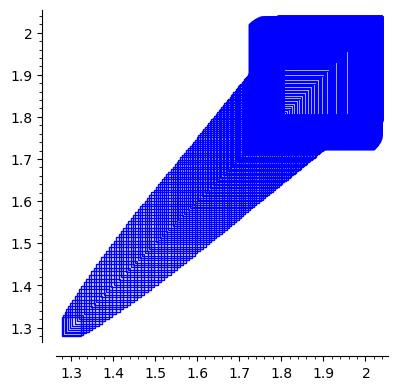

In [23]:
r.sage_interval_plot('x3', 'x5', 0.01)

entering managed function sage_interval_plot
entering global manager
num_flowpipes: 0
swapping variables
=== before ===
global: 0 dim
local: 0 dim
global: 0 flowpipes
stored: 0 flowpipes
=== after ===
global: 0 dim
local: 0 dim
global: 0 flowpipes
stored: 0 flowpipes
stack: [<flowstar.global_manager.FlowstarGlobalManager object at 0x7f2e9886bd60>]
num_flowpipes: 0
var_id_x = -1
var_id_y = -1
entering global manager
num_flowpipes: 0
stack: [<flowstar.global_manager.FlowstarGlobalManager object at 0x7f2e9886bd60>, <flowstar.global_manager.FlowstarGlobalManager object at 0x7f2e9886bd60>]
num_flowpipes: 0
exiting global manager
num_flowpipes: 0
stack: [<flowstar.global_manager.FlowstarGlobalManager object at 0x7f2e9886bd60>]
entering managed function __call__
entering global manager
num_flowpipes: 0
stack: [<flowstar.global_manager.FlowstarGlobalManager object at 0x7f2e9886bd60>, <flowstar.global_manager.FlowstarGlobalManager object at 0x7f2e9886bd60>]
num_flowpipes: 0
entering managed fun

exiting global manager
num_flowpipes: 0
stack: [<flowstar.global_manager.FlowstarGlobalManager object at 0x7f2e9886bd60>]
entering managed function __call__
entering global manager
num_flowpipes: 0
stack: [<flowstar.global_manager.FlowstarGlobalManager object at 0x7f2e9886bd60>, <flowstar.global_manager.FlowstarGlobalManager object at 0x7f2e9886bd60>]
num_flowpipes: 0
entering managed function prepare
entering global manager
num_flowpipes: 0
stack: [<flowstar.global_manager.FlowstarGlobalManager object at 0x7f2e9886bd60>, <flowstar.global_manager.FlowstarGlobalManager object at 0x7f2e9886bd60>, <flowstar.global_manager.FlowstarGlobalManager object at 0x7f2e9886bd60>]
num_flowpipes: 0
exiting global manager
num_flowpipes: 0
stack: [<flowstar.global_manager.FlowstarGlobalManager object at 0x7f2e9886bd60>, <flowstar.global_manager.FlowstarGlobalManager object at 0x7f2e9886bd60>]
exiting global manager
num_flowpipes: 0
stack: [<flowstar.global_manager.FlowstarGlobalManager object at 0x7f2e

exiting global manager
num_flowpipes: 0
stack: [<flowstar.global_manager.FlowstarGlobalManager object at 0x7f2e9886bd60>]
entering managed function __call__
entering global manager
num_flowpipes: 0
stack: [<flowstar.global_manager.FlowstarGlobalManager object at 0x7f2e9886bd60>, <flowstar.global_manager.FlowstarGlobalManager object at 0x7f2e9886bd60>]
num_flowpipes: 0
entering managed function prepare
entering global manager
num_flowpipes: 0
stack: [<flowstar.global_manager.FlowstarGlobalManager object at 0x7f2e9886bd60>, <flowstar.global_manager.FlowstarGlobalManager object at 0x7f2e9886bd60>, <flowstar.global_manager.FlowstarGlobalManager object at 0x7f2e9886bd60>]
num_flowpipes: 0
exiting global manager
num_flowpipes: 0
stack: [<flowstar.global_manager.FlowstarGlobalManager object at 0x7f2e9886bd60>, <flowstar.global_manager.FlowstarGlobalManager object at 0x7f2e9886bd60>]
exiting global manager
num_flowpipes: 0
stack: [<flowstar.global_manager.FlowstarGlobalManager object at 0x7f2e

exiting global manager
num_flowpipes: 0
stack: [<flowstar.global_manager.FlowstarGlobalManager object at 0x7f2e9886bd60>]
entering managed function __call__
entering global manager
num_flowpipes: 0
stack: [<flowstar.global_manager.FlowstarGlobalManager object at 0x7f2e9886bd60>, <flowstar.global_manager.FlowstarGlobalManager object at 0x7f2e9886bd60>]
num_flowpipes: 0
entering managed function prepare
entering global manager
num_flowpipes: 0
stack: [<flowstar.global_manager.FlowstarGlobalManager object at 0x7f2e9886bd60>, <flowstar.global_manager.FlowstarGlobalManager object at 0x7f2e9886bd60>, <flowstar.global_manager.FlowstarGlobalManager object at 0x7f2e9886bd60>]
num_flowpipes: 0
exiting global manager
num_flowpipes: 0
stack: [<flowstar.global_manager.FlowstarGlobalManager object at 0x7f2e9886bd60>, <flowstar.global_manager.FlowstarGlobalManager object at 0x7f2e9886bd60>]
exiting global manager
num_flowpipes: 0
stack: [<flowstar.global_manager.FlowstarGlobalManager object at 0x7f2e

exiting global manager
num_flowpipes: 0
stack: [<flowstar.global_manager.FlowstarGlobalManager object at 0x7f2e9886bd60>]
entering managed function __call__
entering global manager
num_flowpipes: 0
stack: [<flowstar.global_manager.FlowstarGlobalManager object at 0x7f2e9886bd60>, <flowstar.global_manager.FlowstarGlobalManager object at 0x7f2e9886bd60>]
num_flowpipes: 0
entering managed function prepare
entering global manager
num_flowpipes: 0
stack: [<flowstar.global_manager.FlowstarGlobalManager object at 0x7f2e9886bd60>, <flowstar.global_manager.FlowstarGlobalManager object at 0x7f2e9886bd60>, <flowstar.global_manager.FlowstarGlobalManager object at 0x7f2e9886bd60>]
num_flowpipes: 0
exiting global manager
num_flowpipes: 0
stack: [<flowstar.global_manager.FlowstarGlobalManager object at 0x7f2e9886bd60>, <flowstar.global_manager.FlowstarGlobalManager object at 0x7f2e9886bd60>]
exiting global manager
num_flowpipes: 0
stack: [<flowstar.global_manager.FlowstarGlobalManager object at 0x7f2e

exiting global manager
num_flowpipes: 0
stack: [<flowstar.global_manager.FlowstarGlobalManager object at 0x7f2e9886bd60>]
entering managed function __call__
entering global manager
num_flowpipes: 0
stack: [<flowstar.global_manager.FlowstarGlobalManager object at 0x7f2e9886bd60>, <flowstar.global_manager.FlowstarGlobalManager object at 0x7f2e9886bd60>]
num_flowpipes: 0
entering managed function prepare
entering global manager
num_flowpipes: 0
stack: [<flowstar.global_manager.FlowstarGlobalManager object at 0x7f2e9886bd60>, <flowstar.global_manager.FlowstarGlobalManager object at 0x7f2e9886bd60>, <flowstar.global_manager.FlowstarGlobalManager object at 0x7f2e9886bd60>]
num_flowpipes: 0
exiting global manager
num_flowpipes: 0
stack: [<flowstar.global_manager.FlowstarGlobalManager object at 0x7f2e9886bd60>, <flowstar.global_manager.FlowstarGlobalManager object at 0x7f2e9886bd60>]
exiting global manager
num_flowpipes: 0
stack: [<flowstar.global_manager.FlowstarGlobalManager object at 0x7f2e

exiting global manager
num_flowpipes: 0
stack: [<flowstar.global_manager.FlowstarGlobalManager object at 0x7f2e9886bd60>]
entering managed function __call__
entering global manager
num_flowpipes: 0
stack: [<flowstar.global_manager.FlowstarGlobalManager object at 0x7f2e9886bd60>, <flowstar.global_manager.FlowstarGlobalManager object at 0x7f2e9886bd60>]
num_flowpipes: 0
entering managed function prepare
entering global manager
num_flowpipes: 0
stack: [<flowstar.global_manager.FlowstarGlobalManager object at 0x7f2e9886bd60>, <flowstar.global_manager.FlowstarGlobalManager object at 0x7f2e9886bd60>, <flowstar.global_manager.FlowstarGlobalManager object at 0x7f2e9886bd60>]
num_flowpipes: 0
exiting global manager
num_flowpipes: 0
stack: [<flowstar.global_manager.FlowstarGlobalManager object at 0x7f2e9886bd60>, <flowstar.global_manager.FlowstarGlobalManager object at 0x7f2e9886bd60>]
exiting global manager
num_flowpipes: 0
stack: [<flowstar.global_manager.FlowstarGlobalManager object at 0x7f2e

exiting global manager
num_flowpipes: 0
stack: [<flowstar.global_manager.FlowstarGlobalManager object at 0x7f2e9886bd60>]
entering managed function __call__
entering global manager
num_flowpipes: 0
stack: [<flowstar.global_manager.FlowstarGlobalManager object at 0x7f2e9886bd60>, <flowstar.global_manager.FlowstarGlobalManager object at 0x7f2e9886bd60>]
num_flowpipes: 0
entering managed function prepare
entering global manager
num_flowpipes: 0
stack: [<flowstar.global_manager.FlowstarGlobalManager object at 0x7f2e9886bd60>, <flowstar.global_manager.FlowstarGlobalManager object at 0x7f2e9886bd60>, <flowstar.global_manager.FlowstarGlobalManager object at 0x7f2e9886bd60>]
num_flowpipes: 0
exiting global manager
num_flowpipes: 0
stack: [<flowstar.global_manager.FlowstarGlobalManager object at 0x7f2e9886bd60>, <flowstar.global_manager.FlowstarGlobalManager object at 0x7f2e9886bd60>]
exiting global manager
num_flowpipes: 0
stack: [<flowstar.global_manager.FlowstarGlobalManager object at 0x7f2e

exiting global manager
num_flowpipes: 0
stack: [<flowstar.global_manager.FlowstarGlobalManager object at 0x7f2e9886bd60>]
entering managed function __call__
entering global manager
num_flowpipes: 0
stack: [<flowstar.global_manager.FlowstarGlobalManager object at 0x7f2e9886bd60>, <flowstar.global_manager.FlowstarGlobalManager object at 0x7f2e9886bd60>]
num_flowpipes: 0
entering managed function prepare
entering global manager
num_flowpipes: 0
stack: [<flowstar.global_manager.FlowstarGlobalManager object at 0x7f2e9886bd60>, <flowstar.global_manager.FlowstarGlobalManager object at 0x7f2e9886bd60>, <flowstar.global_manager.FlowstarGlobalManager object at 0x7f2e9886bd60>]
num_flowpipes: 0
exiting global manager
num_flowpipes: 0
stack: [<flowstar.global_manager.FlowstarGlobalManager object at 0x7f2e9886bd60>, <flowstar.global_manager.FlowstarGlobalManager object at 0x7f2e9886bd60>]
exiting global manager
num_flowpipes: 0
stack: [<flowstar.global_manager.FlowstarGlobalManager object at 0x7f2e

exiting global manager
num_flowpipes: 0
stack: [<flowstar.global_manager.FlowstarGlobalManager object at 0x7f2e9886bd60>]
entering managed function __call__
entering global manager
num_flowpipes: 0
stack: [<flowstar.global_manager.FlowstarGlobalManager object at 0x7f2e9886bd60>, <flowstar.global_manager.FlowstarGlobalManager object at 0x7f2e9886bd60>]
num_flowpipes: 0
entering managed function prepare
entering global manager
num_flowpipes: 0
stack: [<flowstar.global_manager.FlowstarGlobalManager object at 0x7f2e9886bd60>, <flowstar.global_manager.FlowstarGlobalManager object at 0x7f2e9886bd60>, <flowstar.global_manager.FlowstarGlobalManager object at 0x7f2e9886bd60>]
num_flowpipes: 0
exiting global manager
num_flowpipes: 0
stack: [<flowstar.global_manager.FlowstarGlobalManager object at 0x7f2e9886bd60>, <flowstar.global_manager.FlowstarGlobalManager object at 0x7f2e9886bd60>]
exiting global manager
num_flowpipes: 0
stack: [<flowstar.global_manager.FlowstarGlobalManager object at 0x7f2e

exiting global manager
num_flowpipes: 0
stack: [<flowstar.global_manager.FlowstarGlobalManager object at 0x7f2e9886bd60>]
entering managed function __call__
entering global manager
num_flowpipes: 0
stack: [<flowstar.global_manager.FlowstarGlobalManager object at 0x7f2e9886bd60>, <flowstar.global_manager.FlowstarGlobalManager object at 0x7f2e9886bd60>]
num_flowpipes: 0
entering managed function prepare
entering global manager
num_flowpipes: 0
stack: [<flowstar.global_manager.FlowstarGlobalManager object at 0x7f2e9886bd60>, <flowstar.global_manager.FlowstarGlobalManager object at 0x7f2e9886bd60>, <flowstar.global_manager.FlowstarGlobalManager object at 0x7f2e9886bd60>]
num_flowpipes: 0
exiting global manager
num_flowpipes: 0
stack: [<flowstar.global_manager.FlowstarGlobalManager object at 0x7f2e9886bd60>, <flowstar.global_manager.FlowstarGlobalManager object at 0x7f2e9886bd60>]
exiting global manager
num_flowpipes: 0
stack: [<flowstar.global_manager.FlowstarGlobalManager object at 0x7f2e

exiting global manager
num_flowpipes: 0
stack: [<flowstar.global_manager.FlowstarGlobalManager object at 0x7f2e9886bd60>]
entering managed function __call__
entering global manager
num_flowpipes: 0
stack: [<flowstar.global_manager.FlowstarGlobalManager object at 0x7f2e9886bd60>, <flowstar.global_manager.FlowstarGlobalManager object at 0x7f2e9886bd60>]
num_flowpipes: 0
entering managed function prepare
entering global manager
num_flowpipes: 0
stack: [<flowstar.global_manager.FlowstarGlobalManager object at 0x7f2e9886bd60>, <flowstar.global_manager.FlowstarGlobalManager object at 0x7f2e9886bd60>, <flowstar.global_manager.FlowstarGlobalManager object at 0x7f2e9886bd60>]
num_flowpipes: 0
exiting global manager
num_flowpipes: 0
stack: [<flowstar.global_manager.FlowstarGlobalManager object at 0x7f2e9886bd60>, <flowstar.global_manager.FlowstarGlobalManager object at 0x7f2e9886bd60>]
exiting global manager
num_flowpipes: 0
stack: [<flowstar.global_manager.FlowstarGlobalManager object at 0x7f2e

exiting global manager
num_flowpipes: 0
stack: [<flowstar.global_manager.FlowstarGlobalManager object at 0x7f2e9886bd60>]
entering managed function __call__
entering global manager
num_flowpipes: 0
stack: [<flowstar.global_manager.FlowstarGlobalManager object at 0x7f2e9886bd60>, <flowstar.global_manager.FlowstarGlobalManager object at 0x7f2e9886bd60>]
num_flowpipes: 0
entering managed function prepare
entering global manager
num_flowpipes: 0
stack: [<flowstar.global_manager.FlowstarGlobalManager object at 0x7f2e9886bd60>, <flowstar.global_manager.FlowstarGlobalManager object at 0x7f2e9886bd60>, <flowstar.global_manager.FlowstarGlobalManager object at 0x7f2e9886bd60>]
num_flowpipes: 0
exiting global manager
num_flowpipes: 0
stack: [<flowstar.global_manager.FlowstarGlobalManager object at 0x7f2e9886bd60>, <flowstar.global_manager.FlowstarGlobalManager object at 0x7f2e9886bd60>]
exiting global manager
num_flowpipes: 0
stack: [<flowstar.global_manager.FlowstarGlobalManager object at 0x7f2e

num_flowpipes: 0
stack: [<flowstar.global_manager.FlowstarGlobalManager object at 0x7f2e9886bd60>, <flowstar.global_manager.FlowstarGlobalManager object at 0x7f2e9886bd60>]
num_flowpipes: 0
entering managed function prepare
entering global manager
num_flowpipes: 0
stack: [<flowstar.global_manager.FlowstarGlobalManager object at 0x7f2e9886bd60>, <flowstar.global_manager.FlowstarGlobalManager object at 0x7f2e9886bd60>, <flowstar.global_manager.FlowstarGlobalManager object at 0x7f2e9886bd60>]
num_flowpipes: 0
exiting global manager
num_flowpipes: 0
stack: [<flowstar.global_manager.FlowstarGlobalManager object at 0x7f2e9886bd60>, <flowstar.global_manager.FlowstarGlobalManager object at 0x7f2e9886bd60>]
exiting global manager
num_flowpipes: 0
stack: [<flowstar.global_manager.FlowstarGlobalManager object at 0x7f2e9886bd60>]
entering managed function __call__
entering global manager
num_flowpipes: 0
stack: [<flowstar.global_manager.FlowstarGlobalManager object at 0x7f2e9886bd60>, <flowstar.gl

exiting global manager
num_flowpipes: 0
stack: [<flowstar.global_manager.FlowstarGlobalManager object at 0x7f2e9886bd60>]
entering managed function __call__
entering global manager
num_flowpipes: 0
stack: [<flowstar.global_manager.FlowstarGlobalManager object at 0x7f2e9886bd60>, <flowstar.global_manager.FlowstarGlobalManager object at 0x7f2e9886bd60>]
num_flowpipes: 0
entering managed function prepare
entering global manager
num_flowpipes: 0
stack: [<flowstar.global_manager.FlowstarGlobalManager object at 0x7f2e9886bd60>, <flowstar.global_manager.FlowstarGlobalManager object at 0x7f2e9886bd60>, <flowstar.global_manager.FlowstarGlobalManager object at 0x7f2e9886bd60>]
num_flowpipes: 0
exiting global manager
num_flowpipes: 0
stack: [<flowstar.global_manager.FlowstarGlobalManager object at 0x7f2e9886bd60>, <flowstar.global_manager.FlowstarGlobalManager object at 0x7f2e9886bd60>]
exiting global manager
num_flowpipes: 0
stack: [<flowstar.global_manager.FlowstarGlobalManager object at 0x7f2e

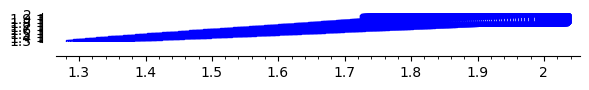

In [24]:
out = r.sage_interval_plot('x4', 'x6', 0.01)
out.set_aspect_ratio(1/18)
out

In [ ]:
r.wplot('x3', 'x5')

In [ ]:
r.wplot('x4', 'x6')

In [27]:
sys_real.varmap

bidict({'x1': x1, 'x2': x2, 'x3': x3, 'x4': x4, 'x5': x5, 'x6': x6, 'x7': x7, 'x8': x8, 'x9': x9})

In [28]:
fl = lambda t: r(RIF(t))[5].lower()
fu = lambda t: r(RIF(t))[5].upper()
gl = lambda t: r(RIF(t))[3].lower()
gu = lambda t: r(RIF(t))[3].upper()

In [29]:
fl(0), fu(0)

(1.27994857010101, 1.32005885676383)

In [30]:
gl(0), gu(0)

(0.0799454261676199, 0.120047556972802)

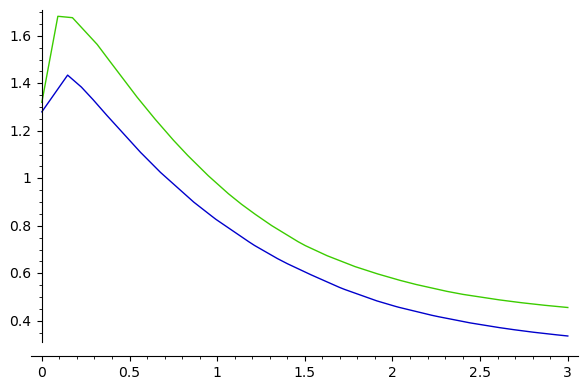

In [31]:
plot((fl, fu), (0, 3), plot_points=30, adaptive_recursion=0, randomize=False)

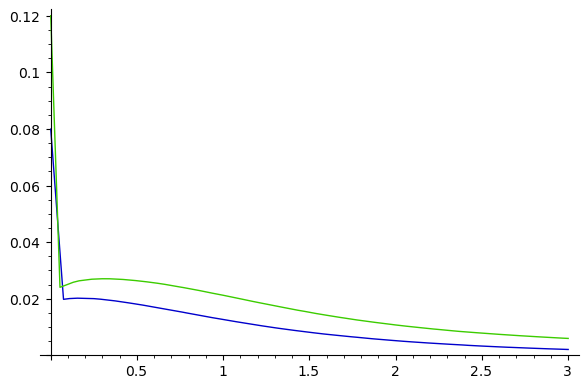

In [32]:
plot((gl, gu), (0, 3), plot_points=50, adaptive_recursion=0, randomize=False)

In [33]:
from flowstar.instrumentation import AggregateMetric

In [34]:
agg = AggregateMetric()

In [35]:
from time import sleep
import instrument

with instrument.block(name='test', metric=agg.metric):
    print("test A ...")
    sleep(2)

with instrument.block(name='test', metric=agg.metric):
    print("test B ...")
    sleep(3)
    
agg.print()

test A ...
test B ...
ran "test" 2 times in 5.004337787628174


In [36]:
sig = F([0, 0.5], Atomic(var("x6") > 1.4) & G([0, 0.1], Atomic(var("x6") < 1.8)  & F([0, 1], Atomic(var("x6") < 1) & Atomic(var("x4") < 0.02)))).signal(r)
sig

PolyObserver(x6 - 1.4000000000000000?, <flowstar.reachability.Reach object at 0x55d72da76800>, -0.10000000000000000?*x1*x6 - x2*x6 - 2*x6*x8 + 50*x3 + 100*x4 + 50*x5 - x6 symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
symbolic_composition=False, tentative_unpreconditioning=True
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.00 seconds
roots = []
domain = [0.0000000000000000 .. 2.9990000000000002]
roots = []
seg_domain = [0.0000000000000000 .. 2.9990000000000002]
roots = []
In G.signal
PolyObserver(-x6 + 1.8000000000000001?, <flowstar.reachability.Reach object at 0x55d72da76800>, 0.10000000000000000?*x1*x6 + x2*x6 + 2*x6*x8 - 50*x3 - 100*x4 - 50*x5 + x6 symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
symbolic_composition=False, tentative_unpreconditioning=True
roots(space_domain=None, epsilon=1e-05, verbosity=0)
top-level root detection: 1 items in 0.00 seconds
roots = []
domain = [0.00000000

Signal([0.0000000000000000 .. 2.9990000000000002], [([0.0000000000000000 .. 2.4990000000000002], False)], mask=None)

In [37]:
r.instrumentor.print()

ran "composing flowpipe" 3004 times in 47.40074443817139
ran "mask intersect check" 4000 times in 0.004580020904541016


/usr/lib64/python3.7/site-packages/sage/plot/contour_plot.py:205: UserWarning: No contour levels were found within the data range.
  linewidths=linewidths, linestyles=linestyles)


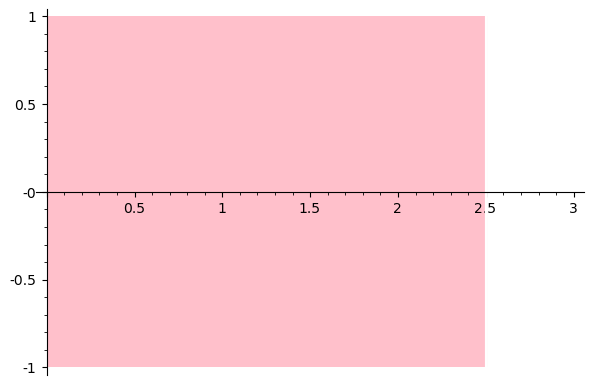

In [38]:
sig.plot()

In [39]:
def test_monitoring(prop, duration, **kwargs):
    t0 = time.time()
    sig = prop.signal_for_system(sys,
    duration, order=4, step=0.003,
    precondition=1,
    estimation=1e-1,
    max_remainder_queue=100,
    integration_method=IntegrationMethod.ONLY_PICARD_SYMB,
    cutoff_threshold=1e-6,
    **kwargs)
    t1 = time.time()
    print(f"Run done in {t1 - t0} sec\noptions: {repr(kwargs)}")
    return t1 - t0, sig

In [40]:
prop = F([0, 0.5], Atomic(var("x6") > 1.4) & G([0, 0.1], Atomic(var("x6") < 1.8)  & F([0, 1], Atomic(var("x6") < 1) & Atomic(var("x4") < 0.02))))
prop

F([0.0000000000000000 .. 0.50000000000000000], And([Atomic(x6 > 1.40000000000000), G([0.0000000000000000 .. 0.10000000000000001], And([Atomic(x6 < 1.80000000000000), F([0 .. 1], And([Atomic(x6 < 1), Atomic(x4 < 0.0200000000000000)]))]))]))

Precomposing Contexts: 1 items in 0.00 seconds
calling reach with y0 = ['[0.97999999999999998 .. 1.0200000000000001]', '[1.2799999999999998 .. 1.3200000000000001]', '[0.079999999999999987 .. 0.12000000000000001]', '[0.079999999999999987 .. 0.12000000000000001]', '[0.079999999999999987 .. 0.12000000000000001]', '[1.2799999999999998 .. 1.3200000000000001]', '[2.4799999999999999 .. 2.5200000000000001]', '[0.57999999999999996 .. 0.62000000000000011]', '[1.2799999999999998 .. 1.3200000000000001]']
ode in polynomial ring
crude_roots = False
_handle_initials called!
vars = [x1, x2, x3, x4, x5, x6, x7, x8, x9]
C = [0.98..1.02]
C = [1.2799999999999998..1.32]
C = [0.07999999999999999..0.12000000000000001]
C = [0.07999999999999999..0.12000000000000001]
C = [0.07999999999999999..0.12000000000000001]
C = [1.2799999999999998..1.32]
C = [2.48..2.52]
C = [0.58..0.6200000000000001]
C = [1.2799999999999998..1.32]
integrationScheme = 7
Running Flow*: 1 items in 72.61 seconds
Computed 1867 flowpipes in 72

/usr/lib64/python3.7/site-packages/sage/plot/contour_plot.py:205: UserWarning: No contour levels were found within the data range.
  linewidths=linewidths, linestyles=linestyles)


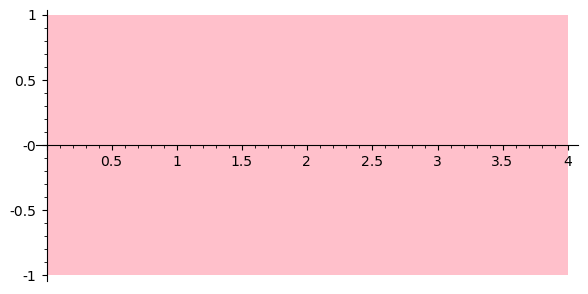

In [41]:
test_monitoring(prop, 4, use_masks=False)[1].plot()

Precomposing Contexts: 1 items in 0.00 seconds
calling reach with y0 = ['[0.97999999999999998 .. 1.0200000000000001]', '[1.2799999999999998 .. 1.3200000000000001]', '[0.079999999999999987 .. 0.12000000000000001]', '[0.079999999999999987 .. 0.12000000000000001]', '[0.079999999999999987 .. 0.12000000000000001]', '[1.2799999999999998 .. 1.3200000000000001]', '[2.4799999999999999 .. 2.5200000000000001]', '[0.57999999999999996 .. 0.62000000000000011]', '[1.2799999999999998 .. 1.3200000000000001]']
ode in polynomial ring
crude_roots = False
_handle_initials called!
vars = [x1, x2, x3, x4, x5, x6, x7, x8, x9]
C = [0.98..1.02]
C = [1.2799999999999998..1.32]
C = [0.07999999999999999..0.12000000000000001]
C = [0.07999999999999999..0.12000000000000001]
C = [0.07999999999999999..0.12000000000000001]
C = [1.2799999999999998..1.32]
C = [2.48..2.52]
C = [0.58..0.6200000000000001]
C = [1.2799999999999998..1.32]
integrationScheme = 7
Running Flow*: 1 items in 76.22 seconds
Computed 1867 flowpipes in 76

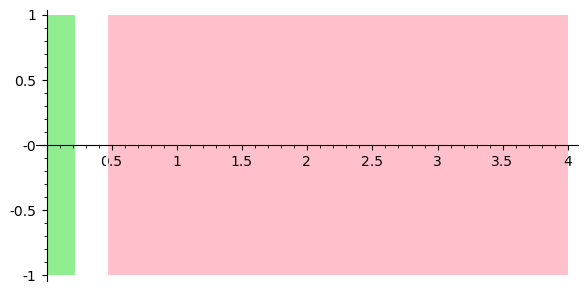

In [42]:
test_monitoring(prop, 4, use_masks=True)[1].plot()

Precomposing Contexts: 1 items in 0.00 seconds
calling reach with y0 = ['[0.97999999999999998 .. 1.0200000000000001]', '[1.2799999999999998 .. 1.3200000000000001]', '[0.079999999999999987 .. 0.12000000000000001]', '[0.079999999999999987 .. 0.12000000000000001]', '[0.079999999999999987 .. 0.12000000000000001]', '[1.2799999999999998 .. 1.3200000000000001]', '[2.4799999999999999 .. 2.5200000000000001]', '[0.57999999999999996 .. 0.62000000000000011]', '[1.2799999999999998 .. 1.3200000000000001]']
ode in polynomial ring
crude_roots = False
_handle_initials called!
vars = [x1, x2, x3, x4, x5, x6, x7, x8, x9]
C = [0.98..1.02]
C = [1.2799999999999998..1.32]
C = [0.07999999999999999..0.12000000000000001]
C = [0.07999999999999999..0.12000000000000001]
C = [0.07999999999999999..0.12000000000000001]
C = [1.2799999999999998..1.32]
C = [2.48..2.52]
C = [0.58..0.6200000000000001]
C = [1.2799999999999998..1.32]
integrationScheme = 7
Running Flow*: 1 items in 37.89 seconds
Computed 867 flowpipes in 37.

/usr/lib64/python3.7/site-packages/sage/plot/contour_plot.py:205: UserWarning: No contour levels were found within the data range.
  linewidths=linewidths, linestyles=linestyles)


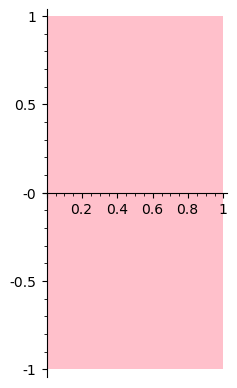

In [43]:
test_monitoring(prop, 1, use_masks=False)[1].plot()

Precomposing Contexts: 1 items in 0.00 seconds
calling reach with y0 = ['[0.97999999999999998 .. 1.0200000000000001]', '[1.2799999999999998 .. 1.3200000000000001]', '[0.079999999999999987 .. 0.12000000000000001]', '[0.079999999999999987 .. 0.12000000000000001]', '[0.079999999999999987 .. 0.12000000000000001]', '[1.2799999999999998 .. 1.3200000000000001]', '[2.4799999999999999 .. 2.5200000000000001]', '[0.57999999999999996 .. 0.62000000000000011]', '[1.2799999999999998 .. 1.3200000000000001]']
ode in polynomial ring
crude_roots = False
_handle_initials called!
vars = [x1, x2, x3, x4, x5, x6, x7, x8, x9]
C = [0.98..1.02]
C = [1.2799999999999998..1.32]
C = [0.07999999999999999..0.12000000000000001]
C = [0.07999999999999999..0.12000000000000001]
C = [0.07999999999999999..0.12000000000000001]
C = [1.2799999999999998..1.32]
C = [2.48..2.52]
C = [0.58..0.6200000000000001]
C = [1.2799999999999998..1.32]
integrationScheme = 7
Running Flow*: 1 items in 37.32 seconds
Computed 867 flowpipes in 37.

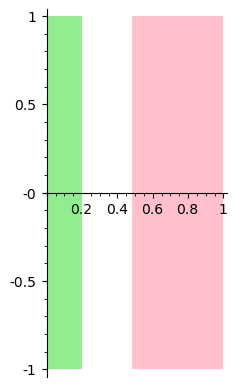

In [44]:
test_monitoring(prop, 1, use_masks=True)[1].plot()

In [45]:
test_monitoring(prop, 0, use_masks=False)[1](0)

Precomposing Contexts: 1 items in 0.00 seconds
calling reach with y0 = ['[0.97999999999999998 .. 1.0200000000000001]', '[1.2799999999999998 .. 1.3200000000000001]', '[0.079999999999999987 .. 0.12000000000000001]', '[0.079999999999999987 .. 0.12000000000000001]', '[0.079999999999999987 .. 0.12000000000000001]', '[1.2799999999999998 .. 1.3200000000000001]', '[2.4799999999999999 .. 2.5200000000000001]', '[0.57999999999999996 .. 0.62000000000000011]', '[1.2799999999999998 .. 1.3200000000000001]']
ode in polynomial ring
crude_roots = False
_handle_initials called!
vars = [x1, x2, x3, x4, x5, x6, x7, x8, x9]
C = [0.98..1.02]
C = [1.2799999999999998..1.32]
C = [0.07999999999999999..0.12000000000000001]
C = [0.07999999999999999..0.12000000000000001]
C = [0.07999999999999999..0.12000000000000001]
C = [1.2799999999999998..1.32]
C = [2.48..2.52]
C = [0.58..0.6200000000000001]
C = [1.2799999999999998..1.32]
integrationScheme = 7
Running Flow*: 1 items in 23.43 seconds
Computed 534 flowpipes in 23.

False

In [46]:
test_monitoring(prop, 0, use_masks=True)[1](0)

Precomposing Contexts: 1 items in 0.00 seconds
calling reach with y0 = ['[0.97999999999999998 .. 1.0200000000000001]', '[1.2799999999999998 .. 1.3200000000000001]', '[0.079999999999999987 .. 0.12000000000000001]', '[0.079999999999999987 .. 0.12000000000000001]', '[0.079999999999999987 .. 0.12000000000000001]', '[1.2799999999999998 .. 1.3200000000000001]', '[2.4799999999999999 .. 2.5200000000000001]', '[0.57999999999999996 .. 0.62000000000000011]', '[1.2799999999999998 .. 1.3200000000000001]']
ode in polynomial ring
crude_roots = False
_handle_initials called!
vars = [x1, x2, x3, x4, x5, x6, x7, x8, x9]
C = [0.98..1.02]
C = [1.2799999999999998..1.32]
C = [0.07999999999999999..0.12000000000000001]
C = [0.07999999999999999..0.12000000000000001]
C = [0.07999999999999999..0.12000000000000001]
C = [1.2799999999999998..1.32]
C = [2.48..2.52]
C = [0.58..0.6200000000000001]
C = [1.2799999999999998..1.32]
integrationScheme = 7
Running Flow*: 1 items in 21.24 seconds
Computed 534 flowpipes in 21.

True

# Optimizing and speedup

In [47]:
P = Atomic(var("x6") > 1.4); P

Atomic(x6 > 1.40000000000000)

Precomposing Contexts: 1 items in 0.00 seconds
calling reach with y0 = ['[0.97999999999999998 .. 1.0200000000000001]', '[1.2799999999999998 .. 1.3200000000000001]', '[0.079999999999999987 .. 0.12000000000000001]', '[0.079999999999999987 .. 0.12000000000000001]', '[0.079999999999999987 .. 0.12000000000000001]', '[1.2799999999999998 .. 1.3200000000000001]', '[2.4799999999999999 .. 2.5200000000000001]', '[0.57999999999999996 .. 0.62000000000000011]', '[1.2799999999999998 .. 1.3200000000000001]']
ode in polynomial ring
crude_roots = False
_handle_initials called!
vars = [x1, x2, x3, x4, x5, x6, x7, x8, x9]
C = [0.98..1.02]
C = [1.2799999999999998..1.32]
C = [0.07999999999999999..0.12000000000000001]
C = [0.07999999999999999..0.12000000000000001]
C = [0.07999999999999999..0.12000000000000001]
C = [1.2799999999999998..1.32]
C = [2.48..2.52]
C = [0.58..0.6200000000000001]
C = [1.2799999999999998..1.32]
integrationScheme = 7
Running Flow*: 1 items in 50.71 seconds
Computed 1334 flowpipes in 50

/usr/lib64/python3.7/site-packages/sage/plot/contour_plot.py:205: UserWarning: No contour levels were found within the data range.
  linewidths=linewidths, linestyles=linestyles)


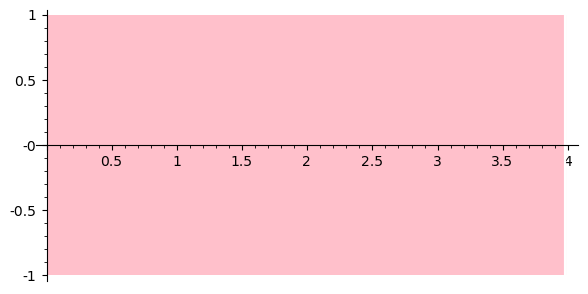

In [48]:
sigP = test_monitoring(P, 4, use_masks=False)[1]
sigP.plot()

/usr/lib64/python3.7/site-packages/sage/plot/contour_plot.py:205: UserWarning: No contour levels were found within the data range.
  linewidths=linewidths, linestyles=linestyles)


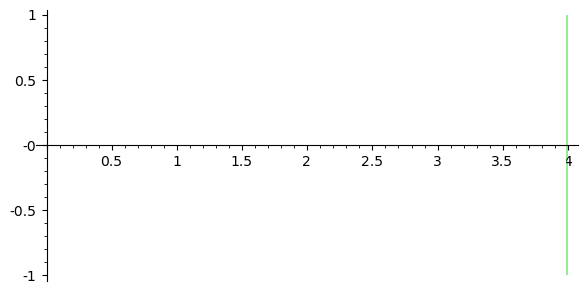

In [49]:
sigP.to_mask_and().plot()

In [50]:
Q = Atomic(var("x6") < 1); Q

Atomic(x6 < 1)

Precomposing Contexts: 1 items in 0.00 seconds
calling reach with y0 = ['[0.97999999999999998 .. 1.0200000000000001]', '[1.2799999999999998 .. 1.3200000000000001]', '[0.079999999999999987 .. 0.12000000000000001]', '[0.079999999999999987 .. 0.12000000000000001]', '[0.079999999999999987 .. 0.12000000000000001]', '[1.2799999999999998 .. 1.3200000000000001]', '[2.4799999999999999 .. 2.5200000000000001]', '[0.57999999999999996 .. 0.62000000000000011]', '[1.2799999999999998 .. 1.3200000000000001]']
ode in polynomial ring
crude_roots = False
_handle_initials called!
vars = [x1, x2, x3, x4, x5, x6, x7, x8, x9]
C = [0.98..1.02]
C = [1.2799999999999998..1.32]
C = [0.07999999999999999..0.12000000000000001]
C = [0.07999999999999999..0.12000000000000001]
C = [0.07999999999999999..0.12000000000000001]
C = [1.2799999999999998..1.32]
C = [2.48..2.52]
C = [0.58..0.6200000000000001]
C = [1.2799999999999998..1.32]
integrationScheme = 7
Running Flow*: 1 items in 55.87 seconds
Computed 1334 flowpipes in 55

/usr/lib64/python3.7/site-packages/sage/plot/contour_plot.py:205: UserWarning: No contour levels were found within the data range.
  linewidths=linewidths, linestyles=linestyles)


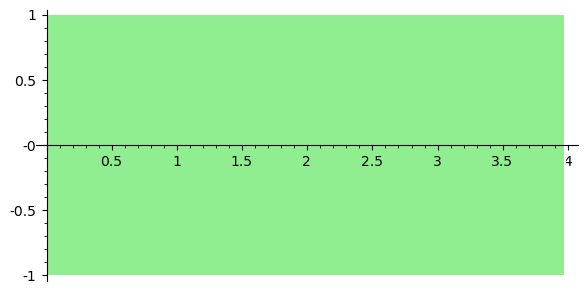

In [51]:
sigQ = test_monitoring(Q, 4, use_masks=False)[1]
sigQ.plot()

Precomposing Contexts: 1 items in 0.00 seconds
calling reach with y0 = ['[0.97999999999999998 .. 1.0200000000000001]', '[1.2799999999999998 .. 1.3200000000000001]', '[0.079999999999999987 .. 0.12000000000000001]', '[0.079999999999999987 .. 0.12000000000000001]', '[0.079999999999999987 .. 0.12000000000000001]', '[1.2799999999999998 .. 1.3200000000000001]', '[2.4799999999999999 .. 2.5200000000000001]', '[0.57999999999999996 .. 0.62000000000000011]', '[1.2799999999999998 .. 1.3200000000000001]']
ode in polynomial ring
crude_roots = False
_handle_initials called!
vars = [x1, x2, x3, x4, x5, x6, x7, x8, x9]
C = [0.98..1.02]
C = [1.2799999999999998..1.32]
C = [0.07999999999999999..0.12000000000000001]
C = [0.07999999999999999..0.12000000000000001]
C = [0.07999999999999999..0.12000000000000001]
C = [1.2799999999999998..1.32]
C = [2.48..2.52]
C = [0.58..0.6200000000000001]
C = [1.2799999999999998..1.32]
integrationScheme = 7
Running Flow*: 1 items in 53.40 seconds
Computed 1334 flowpipes in 53

/usr/lib64/python3.7/site-packages/sage/plot/contour_plot.py:205: UserWarning: No contour levels were found within the data range.
  linewidths=linewidths, linestyles=linestyles)


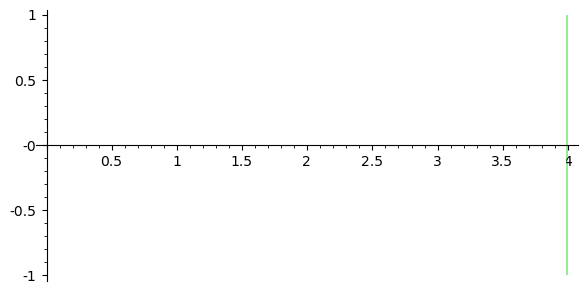

In [52]:
sigQ = test_monitoring(Q, 4, mask=sigP.to_mask_and())[1]
sigQ.plot()

Precomposing Contexts: 1 items in 0.00 seconds
calling reach with y0 = ['[0.97999999999999998 .. 1.0200000000000001]', '[1.2799999999999998 .. 1.3200000000000001]', '[0.079999999999999987 .. 0.12000000000000001]', '[0.079999999999999987 .. 0.12000000000000001]', '[0.079999999999999987 .. 0.12000000000000001]', '[1.2799999999999998 .. 1.3200000000000001]', '[2.4799999999999999 .. 2.5200000000000001]', '[0.57999999999999996 .. 0.62000000000000011]', '[1.2799999999999998 .. 1.3200000000000001]']
ode in polynomial ring
crude_roots = False
_handle_initials called!
vars = [x1, x2, x3, x4, x5, x6, x7, x8, x9]
C = [0.98..1.02]
C = [1.2799999999999998..1.32]
C = [0.07999999999999999..0.12000000000000001]
C = [0.07999999999999999..0.12000000000000001]
C = [0.07999999999999999..0.12000000000000001]
C = [1.2799999999999998..1.32]
C = [2.48..2.52]
C = [0.58..0.6200000000000001]
C = [1.2799999999999998..1.32]
integrationScheme = 7
Running Flow*: 1 items in 53.49 seconds
Computed 1334 flowpipes in 53

/usr/lib64/python3.7/site-packages/sage/plot/contour_plot.py:205: UserWarning: No contour levels were found within the data range.
  linewidths=linewidths, linestyles=linestyles)


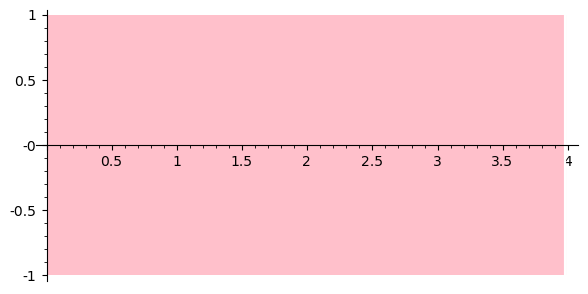

In [53]:
sigPQ = test_monitoring(P & Q, 4, use_masks=False)[1]
sigPQ.plot()

Precomposing Contexts: 1 items in 0.00 seconds
calling reach with y0 = ['[0.97999999999999998 .. 1.0200000000000001]', '[1.2799999999999998 .. 1.3200000000000001]', '[0.079999999999999987 .. 0.12000000000000001]', '[0.079999999999999987 .. 0.12000000000000001]', '[0.079999999999999987 .. 0.12000000000000001]', '[1.2799999999999998 .. 1.3200000000000001]', '[2.4799999999999999 .. 2.5200000000000001]', '[0.57999999999999996 .. 0.62000000000000011]', '[1.2799999999999998 .. 1.3200000000000001]']
ode in polynomial ring
crude_roots = False
_handle_initials called!
vars = [x1, x2, x3, x4, x5, x6, x7, x8, x9]
C = [0.98..1.02]
C = [1.2799999999999998..1.32]
C = [0.07999999999999999..0.12000000000000001]
C = [0.07999999999999999..0.12000000000000001]
C = [0.07999999999999999..0.12000000000000001]
C = [1.2799999999999998..1.32]
C = [2.48..2.52]
C = [0.58..0.6200000000000001]
C = [1.2799999999999998..1.32]
integrationScheme = 7
Running Flow*: 1 items in 52.32 seconds
Computed 1334 flowpipes in 52

/usr/lib64/python3.7/site-packages/sage/plot/contour_plot.py:205: UserWarning: No contour levels were found within the data range.
  linewidths=linewidths, linestyles=linestyles)


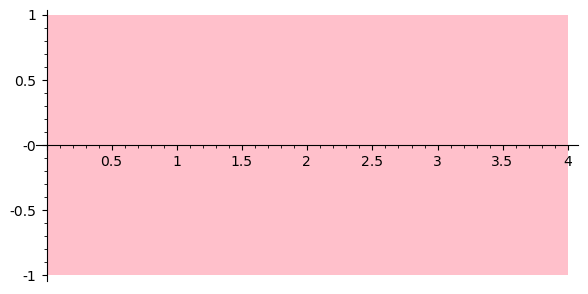

In [54]:
sigPQ = test_monitoring(P & Q, 4, use_masks=True)[1]
sigPQ.plot()